In [1]:
import numpy as np
import numpy.random as rand
from scipy.optimize import curve_fit
from scipy import stats
import math
import sys
import os
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
   sys.path.append(nb_dir)
import timeit

from scipy.stats import chi2

%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
filenames1 = [#
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.05_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.1_New2018_rs.csv',
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.15_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.2_New2018_rs.csv',
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.25_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.3_New2018_rs.csv',
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.35_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.4_New2018_rs.csv', 
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.45_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.5_New2018_rs.csv', 
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.55_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.6_New2018_rs.csv', 
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.65_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.7_New2018_rs.csv',
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.75_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.8_New2018_rs.csv', 
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.85_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.9_New2018_rs.csv', 
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.95_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_1.0_New2018_rs.csv']
with open('ALL_Ep_decay_rs.csv', 'w') as outfile:
    for fname in filenames1:
        with open('./DataGeneration/DataFiles/'+fname) as infile:
            outfile.write(infile.read())

In [3]:
filenames2 = [#
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.05_Lin_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.1_Lin_New2018_rs.csv',
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.15_Lin_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.2_Lin_New2018_rs.csv',
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.25_Lin_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.3_Lin_New2018_rs.csv',
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.35_Lin_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.4_Lin_New2018_rs.csv', 
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.45_Lin_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.5_Lin_New2018_rs.csv', 
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.55_Lin_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.6_Lin_New2018_rs.csv', 
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.65_Lin_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.7_Lin_New2018_rs.csv',
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.75_Lin_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.8_Lin_New2018_rs.csv', 
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.85_Lin_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.9_Lin_New2018_rs.csv', 
              'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_0.95_Lin_New2018_rs.csv', 'sPenaltyData_PooledInh_tau4_v2_7.5_v1_7.5_decay_1.0_Lin_New2018_rs.csv']
with open('ALL_Ep_decay_Lin_rs.csv', 'w') as outfile:                                   
    for fname in filenames2:
        with open('./DataGeneration/DataFiles/'+fname) as infile:
            outfile.write(infile.read())

In [5]:
d0 = []
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
d6 = []
d7 = []

with open('ALL_Ep_decay_rs.csv', 'r') as infile:
    infile.readline
    for line in infile:
        if not line.startswith('#'): # I usually use the first line in a data file to give some info using "#" 
            d0.append(float(line.split(',')[0]))  # "split" separates all objects in a line when delimeter "," occurs
            d1.append(float(line.split(',')[1]))  # all objects in the data file are strings
            d2.append(float(line.split(',')[2]))  # here these are converted using float(....) 
            d3.append(float(line.split(',')[3]))  # "split" separates all objects in a line when delimeter "," occurs
            d4.append(float(line.split(',')[4]))  # all objects in the data file are strings
            d5.append(float(line.split(',')[5]))
            d6.append(float(line.split(',')[6]))
            d7.append(float(line.split(',')[7]))

r_arr = np.asarray(d0)
beta_arr = np.asarray(d1)
Ep_arr = np.asarray(d2)
Ep_norm_arr = np.asarray(d3)
Ep_norm_arr_std = np.asarray(d4)
Val1_arr = np.asarray(d5)
Val2_arr = np.asarray(d6)
Delv_arr = Val1_arr[0::4] - Val2_arr[0::4]
print(Delv_arr)
decay_arr = np.asarray(d7)[0::4]

d0lm = []
d1lm = []
d2lm = []
d3lm = []
d4lm = []
d5lm = []
d6lm = []
d7lm = []


with open('ALL_Ep_decay_Lin_rs.csv', 'r') as infile:
    infile.readline
    for line in infile:
        if not line.startswith('#'): # I usually use the first line in a data file to give some info using "#" 
            d0lm.append(float(line.split(',')[0]))  # "split" separates all objects in a line when delimeter "," occurs
            d1lm.append(float(line.split(',')[1]))  # all objects in the data file are strings
            d2lm.append(float(line.split(',')[2]))  # here these are converted using float(....) 
            d3lm.append(float(line.split(',')[3]))  # "split" separates all objects in a line when delimeter "," occurs
            d4lm.append(float(line.split(',')[4]))  # all objects in the data file are strings
            d5lm.append(float(line.split(',')[5]))
            d6lm.append(float(line.split(',')[6]))
            d7lm.append(float(line.split(',')[7]))

r_arr_lm = np.asarray(d0lm)
beta_arr_lm = np.asarray(d1lm)
Ep_arr_lm = np.asarray(d2lm)
Ep_norm_arr_lm = np.asarray(d3lm)
Ep_norm_arr_std_lm = np.asarray(d4lm)
Val1_arr_lm = np.asarray(d5lm)
Val2_arr_lm = np.asarray(d6lm)
Delv_arr_lm = Val1_arr_lm[0::4] - Val2_arr_lm[0::4]
#print(Delv_arr_lm)
decay_arr_lm = np.asarray(d7lm)[0::4]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


In [6]:
#print(r_arr_lm)
#print(beta_arr_lm)
#print(Ep_arr_lm)
#print(Ep_arr)
#print(Ep_norm_arr_lm)
#print(Val1_arr_lm)
#print(Val2_arr_lm)
#print(decay_arr_lm)

In [7]:
curve_Ep_Delv_r0p5 = []
curve_Ep_Delv_r1p0 = []
curve_Ep_Delv_r1p5 = []
curve_Ep_Delv_r2p0 = []
std_Ep_Delv_r0p5 = []
std_Ep_Delv_r1p0 = []
std_Ep_Delv_r1p5 = []
std_Ep_Delv_r2p0 = []

curve_Ep_Delv_r0p5_lm = []
curve_Ep_Delv_r1p0_lm = []
curve_Ep_Delv_r1p5_lm = []
curve_Ep_Delv_r2p0_lm = []
std_Ep_Delv_r0p5_lm = []
std_Ep_Delv_r1p0_lm = []
std_Ep_Delv_r1p5_lm = []
std_Ep_Delv_r2p0_lm = []

eps = 1e-6
for kk in range(len(r_arr)):
    if r_arr[kk] > 0.5 - eps and r_arr[kk] < 0.5 + eps:
        curve_Ep_Delv_r0p5.append(Ep_norm_arr[kk])
        std_Ep_Delv_r0p5.append(Ep_norm_arr_std[kk])
    elif r_arr[kk] > 1.0 - eps and r_arr[kk] < 1.0 + eps:
        curve_Ep_Delv_r1p0.append(Ep_norm_arr[kk])
        std_Ep_Delv_r1p0.append(Ep_norm_arr_std[kk])
    elif r_arr[kk] > 1.5 - eps and r_arr[kk] < 1.5 + eps:
        curve_Ep_Delv_r1p5.append(Ep_norm_arr[kk])
        std_Ep_Delv_r1p5.append(Ep_norm_arr_std[kk])
    else:
        curve_Ep_Delv_r2p0.append(Ep_norm_arr[kk])
        std_Ep_Delv_r2p0.append(Ep_norm_arr_std[kk])

for kk in range(len(r_arr_lm)):
    if r_arr_lm[kk] > 0.5 - eps and r_arr_lm[kk] < 0.5 + eps:
        curve_Ep_Delv_r0p5_lm.append(Ep_norm_arr_lm[kk])
        std_Ep_Delv_r0p5_lm.append(Ep_norm_arr_std_lm[kk])
    elif r_arr_lm[kk] > 1.0 - eps and r_arr_lm[kk] < 1.0 + eps:
        curve_Ep_Delv_r1p0_lm.append(Ep_norm_arr_lm[kk])
        std_Ep_Delv_r1p0_lm.append(Ep_norm_arr_std_lm[kk])
    elif r_arr_lm[kk] > 1.5 - eps and r_arr_lm[kk] < 1.5 + eps:
        curve_Ep_Delv_r1p5_lm.append(Ep_norm_arr_lm[kk])
        std_Ep_Delv_r1p5_lm.append(Ep_norm_arr_std_lm[kk])
    else:
        curve_Ep_Delv_r2p0_lm.append(Ep_norm_arr_lm[kk])
        std_Ep_Delv_r2p0_lm.append(Ep_norm_arr_std_lm[kk])

In [8]:
def dataSet(choose_dataset, n):
    if choose_dataset == 'r0p5':
        ydata = curve_Ep_Delv_r0p5
        sem = np.asarray(std_Ep_Delv_r0p5)/np.sqrt(n)
        xdata = decay_arr
        #xdata_refined = np.linspace(Delv_arr[0], Delv_arr[-1], 100)
    elif choose_dataset == 'r1p0':
        ydata = curve_Ep_Delv_r1p0
        sem = np.asarray(std_Ep_Delv_r1p0)/np.sqrt(n)
        xdata = decay_arr
        #xdata_refined = np.linspace(Delv_arr[0], Delv_arr[-1], 100)
    elif choose_dataset == 'r1p5':
        ydata = curve_Ep_Delv_r1p5
        sem = np.asarray(std_Ep_Delv_r1p5)/np.sqrt(n)
        xdata = decay_arr
        #xdata_refined = np.linspace(Delv_arr[0], Delv_arr[-1], 100)
    elif choose_dataset == 'r2p0':
        ydata = curve_Ep_Delv_r2p0
        sem = np.asarray(std_Ep_Delv_r2p0)/np.sqrt(n)
        xdata = decay_arr
        #xdata_refined = np.linspace(Delv_arr[0], Delv_arr[-1], 100)
    elif choose_dataset == 'r0p5_lm':
        ydata = curve_Ep_Delv_r0p5_lm
        sem = np.asarray(std_Ep_Delv_r0p5_lm)/np.sqrt(n)
        xdata = decay_arr_lm
        #xdata_refined = np.linspace(Delv_arr_lm[0], Delv_arr_lm[-1], 100)
    elif choose_dataset == 'r1p0_lm':
        ydata = curve_Ep_Delv_r1p0_lm
        sem = np.asarray(std_Ep_Delv_r1p0_lm)/np.sqrt(n)
        xdata = decay_arr_lm
        #xdata_refined = np.linspace(Delv_arr_lm[0], Delv_arr_lm[-1], 100)
    elif choose_dataset == 'r1p5_lm':
        ydata = curve_Ep_Delv_r1p5_lm
        sem = np.asarray(std_Ep_Delv_r1p5_lm)/np.sqrt(n)
        xdata = decay_arr_lm
        #xdata_refined = np.linspace(Delv_arr_lm[0], Delv_arr_lm[-1], 100)
    elif choose_dataset == 'r2p0_lm':
        ydata = curve_Ep_Delv_r2p0_lm
        sem = np.asarray(std_Ep_Delv_r2p0_lm)/np.sqrt(n)
        xdata = decay_arr_lm
        #xdata_refined = np.linspace(Delv_arr_lm[0], Delv_arr_lm[-1], 100)
    return ydata, sem, xdata

<IPython.core.display.Javascript object>


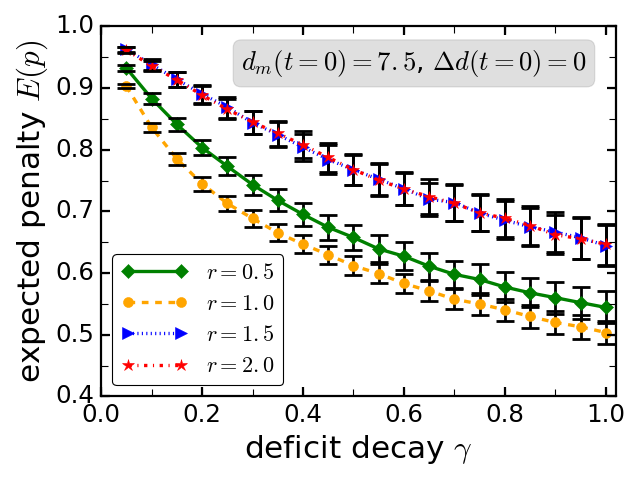

In [9]:
dataset_list = ['r0p5', 'r1p0', 'r1p5', 'r2p0']
dataset_list_lm = ['r0p5_lm', 'r1p0_lm', 'r1p5_lm', 'r2p0_lm']

confidence = 0.95
Ntot = 1000

fig4 = plt.figure()
ax = fig4.add_subplot(111)

index_start = 0
indMod = 1

ydata,sem, xdata = dataSet('r0p5', Ntot)
index_end = len(xdata) + indMod
conf_int = sem * stats.t._ppf((1+confidence)/2., Ntot-1)
yerr = 0.5*sem*np.sqrt(Ntot) #0.5*sem*np.sqrt(n) #sem #1.0*conf_int #or 0.5*std_Ep_Delv_r1p0 or 0.5*sem
##################0.5*np.asarray([0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.1,0.1])
xdata = np.asarray(xdata[index_start:index_end])
ydata = np.asarray(ydata[index_start:index_end])
yerr = np.asarray(yerr[index_start:index_end])
plt.plot(xdata, ydata, 'D-', lw=3, label=r'$r=0.5$', markersize=9, color='g', markeredgecolor='g')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='None', elinewidth =2.5, capsize=8, capthick =2.5, ecolor = 'black')

ydata,sem, xdata = dataSet('r1p0', Ntot)
index_end = len(xdata) + indMod
conf_int = sem * stats.t._ppf((1+confidence)/2., Ntot-1)
yerr = 0.5*sem*np.sqrt(Ntot) #0.5*sem*np.sqrt(n) #sem #1.0*conf_int #or 0.5*std_Ep_Delv_r1p0 or 0.5*sem
##################0.5*np.asarray([0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.1,0.1])
xdata = np.asarray(xdata[index_start:index_end])
ydata = np.asarray(ydata[index_start:index_end])
yerr = np.asarray(yerr[index_start:index_end])
plt.plot(xdata, ydata, 'o--', lw=3, label=r'$r=1.0$', markersize=9, color='orange', markeredgecolor='orange')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='None', elinewidth =2.5, capsize=8, capthick =2.5, ecolor = 'black')

ydata,sem, xdata = dataSet('r1p5', Ntot)
index_end = len(xdata) + indMod
conf_int = sem * stats.t._ppf((1+confidence)/2., Ntot-1)
yerr = 0.5*sem*np.sqrt(Ntot) #0.5*sem*np.sqrt(n) #sem #1.0*conf_int #or 0.5*std_Ep_Delv_r1p0 or 0.5*sem
##################0.5*np.asarray([0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.1,0.1])
xdata = np.asarray(xdata[index_start:index_end])
ydata = np.asarray(ydata[index_start:index_end])
yerr = np.asarray(yerr[index_start:index_end])
plt.plot(xdata, ydata, '>:', lw=3, label=r'$r=1.5$', markersize=10, color='b', markeredgecolor='b')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='None', elinewidth =2.5, capsize=8, capthick =2.5, ecolor = 'black')

ydata,sem, xdata = dataSet('r2p0', Ntot)
index_end = len(xdata) + indMod
conf_int = sem * stats.t._ppf((1+confidence)/2., Ntot-1)
yerr = 0.5*sem*np.sqrt(Ntot) #0.5*sem*np.sqrt(n) #sem #1.0*conf_int #or 0.5*std_Ep_Delv_r1p0 or 0.5*sem
##################0.5*np.asarray([0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.1,0.1])
xdata = np.asarray(xdata[index_start:index_end])
ydata = np.asarray(ydata[index_start:index_end])
yerr = np.asarray(yerr[index_start:index_end])
plt.plot(xdata, ydata, '*', ls='-.', lw=3, label=r'$r=2.0$', markersize=11, color='r', markeredgecolor='r')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='None', elinewidth =2.5, capsize=8, capthick =2.5, ecolor = 'black')

plt.xlabel(r'deficit decay $\gamma$', fontsize=28)
plt.ylabel(r'expected penalty $E(p)$', fontsize=28)

plt.xlim(0,1.02)
plt.ylim(0.4,1.)

ax.tick_params(labelbottom='on',labeltop='off', labelleft='on', labelright='off', pad=6)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0, fontsize=22)
plt.setp( ax.yaxis.get_majorticklabels(), rotation=0, fontsize=22)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params('both', length=8, width=2, which='major')
ax.tick_params('both', length=6, width=1, which='minor')

bbox_props = dict(boxstyle="round", fc="grey", ec="0.5", alpha=0.25)
ax.text(0.62, 0.94, r"$d_m(t=0)=7.5$, $\Delta d(t=0)=0$", ha="center", va="center", size=24,
        bbox=bbox_props)
#ax.annotate(r'$d_m=7.5$',
#            xy=(0.7, 0.97), xycoords='data', fontsize=28,
#            horizontalalignment='center', verticalalignment='center')

plt.legend(loc='lower left', fontsize=20, handlelength=3, fancybox=True)
fig4.set_tight_layout(True) 

<IPython.core.display.Javascript object>


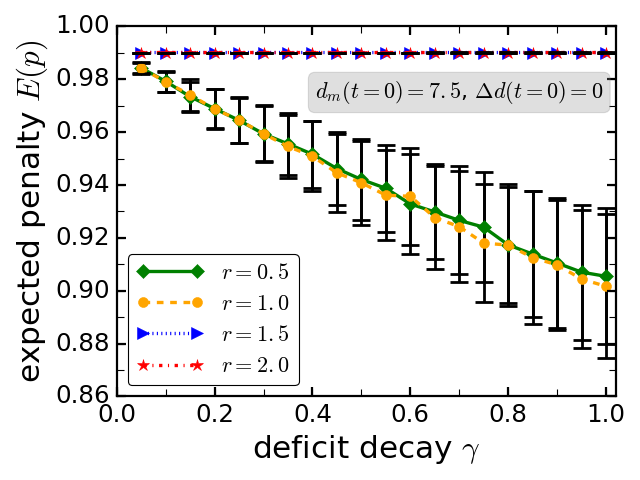

In [10]:
Ntot = 1000

fig5 = plt.figure()
ax = fig5.add_subplot(111)

index_start = 0
index_end = len(xdata) +1

ydata,sem, xdata = dataSet('r0p5_lm', Ntot)
index_end = len(xdata) + indMod
conf_int = sem * stats.t._ppf((1+confidence)/2., Ntot-1)
yerr = 0.5*sem*np.sqrt(Ntot) #0.5*sem*np.sqrt(n) #sem #1.0*conf_int #or 0.5*std_Ep_Delv_r1p0 or 0.5*sem
##################0.5*np.asarray([0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.1,0.1])
xdata = np.asarray(xdata[index_start:index_end])
ydata = np.asarray(ydata[index_start:index_end])
yerr = np.asarray(yerr[index_start:index_end])
plt.plot(xdata, ydata, 'D-', lw=3, label=r'$r=0.5$', markersize=9, color='g', markeredgecolor='g')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='None', elinewidth =2.5, capsize=8, capthick =2.5, ecolor = 'black')

ydata,sem, xdata = dataSet('r1p0_lm', Ntot)
index_end = len(xdata) + indMod
conf_int = sem * stats.t._ppf((1+confidence)/2., Ntot-1)
yerr = 0.5*sem*np.sqrt(Ntot) #0.5*sem*np.sqrt(n) #sem #1.0*conf_int #or 0.5*std_Ep_Delv_r1p0 or 0.5*sem
##################0.5*np.asarray([0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.1,0.1])
xdata = np.asarray(xdata[index_start:index_end])
ydata = np.asarray(ydata[index_start:index_end])
yerr = np.asarray(yerr[index_start:index_end])
plt.plot(xdata, ydata, 'o--', lw=3, label=r'$r=1.0$', markersize=9, color='orange', markeredgecolor='orange')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='None', elinewidth =2.5, capsize=8, capthick =2.5, ecolor = 'black')

ydata,sem, xdata = dataSet('r1p5_lm', Ntot)
index_end = len(xdata) + indMod
conf_int = sem * stats.t._ppf((1+confidence)/2., Ntot-1)
yerr = 0.5*sem*np.sqrt(Ntot) #0.5*sem*np.sqrt(n) #sem #1.0*conf_int #or 0.5*std_Ep_Delv_r1p0 or 0.5*sem
##################0.5*np.asarray([0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.1,0.1])
xdata = np.asarray(xdata[index_start:index_end])
ydata = np.asarray(ydata[index_start:index_end])
yerr = np.asarray(yerr[index_start:index_end])
plt.plot(xdata, ydata, '>:', lw=3, label=r'$r=1.5$', markersize=10, color='b', markeredgecolor='b')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='None', elinewidth =2.5, capsize=8, capthick =2.5, ecolor = 'black')

ydata,sem, xdata = dataSet('r2p0_lm', Ntot)
index_end = len(xdata) + indMod
conf_int = sem * stats.t._ppf((1+confidence)/2., Ntot-1)
yerr = 0.5*sem*np.sqrt(Ntot) #0.5*sem*np.sqrt(n) #sem #1.0*conf_int #or 0.5*std_Ep_Delv_r1p0 or 0.5*sem
##################0.5*np.asarray([0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.02,0.01,0.1,0.1])
xdata = np.asarray(xdata[index_start:index_end])
ydata = np.asarray(ydata[index_start:index_end])
yerr = np.asarray(yerr[index_start:index_end])
plt.plot(xdata, ydata, '*', ls='-.', lw=3, label=r'$r=2.0$', markersize=11, color='r', markeredgecolor='r')
plt.errorbar(xdata, ydata, yerr=yerr, fmt='None', elinewidth =2.5, capsize=8, capthick =2.5, ecolor = 'black')

plt.xlabel(r'deficit decay $\gamma$', fontsize=28)
plt.ylabel(r'expected penalty $E(p)$', fontsize=28)

plt.xlim(0,1.02)
plt.ylim(0.86,1.0)

ax.tick_params(labelbottom='on',labeltop='off', labelleft='on', labelright='off', pad=6)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0, fontsize=22)
plt.setp( ax.yaxis.get_majorticklabels(), rotation=0, fontsize=22)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.02))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params('both', length=8, width=2, which='major')
ax.tick_params('both', length=6, width=1, which='minor')

bbox_props = dict(boxstyle="round", fc="grey", ec="0.5", alpha=0.25)
ax.text(0.7, 0.975, r"$d_m(t=0)=7.5$, $\Delta d(t=0)=0$", ha="center", va="center", size=20,
        bbox=bbox_props)
#ax.annotate(r'$d_m=7.5$',
#            xy=(0.7, 0.97), xycoords='data', fontsize=28,
#            horizontalalignment='center', verticalalignment='center')

plt.legend(loc='lower left', fontsize=20, handlelength=3, fancybox=True)
fig5.set_tight_layout(True) 